In [44]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [45]:
df = pd.read_csv('./results/breakeven_prices_steel.csv')
df.sort_values(by=['Breakeven price ($/ton)'], inplace=True)
df.reset_index(inplace=True)
df.drop(columns=['index'], inplace=True)
df

,Plant,H2 Dem (kg/day),Aux Elec Dem (MWe),Alkaline,HTSE,PEM,ANR type,# ANR modules,Breakeven price ($/ton),Ann. CO2 emissions (kgCO2eq/year),Steel prod. (ton/year),Cost ($/year)
0,Cleveland-Cliffs Indiana Harbor steel plant,9.624916e+05,61.265982,0,963.0,0,iMSR,7,158.514812,2.997579e+08,5236000.0,-5.502791e+08
1,Cleveland-Cliffs Cleveland steel plant,5.165396e+05,32.879566,0,517.0,0,PBR-HTGR,6,159.049197,1.591385e+08,2810000.0,-2.963134e+08
2,U.S. Steel Gary Works,1.217269e+06,77.483447,0,1218.0,0,iMSR,9,160.655366,3.791139e+08,6622000.0,-7.053391e+08
3,Cleveland-Cliffs Burns Harbor steel plant,6.681927e+05,42.532820,0,669.0,0,iMSR,5,162.253567,2.081442e+08,3635000.0,-3.910319e+08
4,Cleveland-Cliffs Middletown steel plant,3.841878e+05,24.454909,0,385.0,0,iMSR,3,168.047490,1.197084e+08,2090000.0,-2.328584e+08
5,U.S. Steel Edgar Thomson Plant,3.819819e+05,24.314498,0,382.0,0,iMSR,3,168.784139,1.189470e+08,2078000.0,-2.325363e+08
6,U.S. Steel Granite City Works,4.669077e+05,29.720320,0,467.0,0,PBR-HTGR,6,172.883302,1.438183e+08,2540000.0,-2.911389e+08
7,Cleveland-Cliffs Dearborn steel plant,4.595548e+05,29.252283,0,460.0,0,PBR-HTGR,6,175.212374,1.415855e+08,2500000.0,-2.904145e+08
8,Cleveland-Cliffs Riverdale steel plant,1.838219e+05,11.700913,0,184.0,0,PBR-HTGR,3,211.835182,5.663419e+07,1000000.0,-1.404467e+08


In [46]:
anr_param = pd.read_excel('ANRs.xlsx', sheet_name='FOAK')
anr_param

,Reactor,Type,Power in MWe,Power in MWt,MSL in MWe,Thermal Efficiency,Thermal transfer efficiency,MDT in hours,Ramp Rate (fraction of capacity/hr),Ramp Rate (MW/hr),Outlet Temp (C),CAPEX $/MWe,FOPEX $/MWe-y,Max Modules,VOM in $/MWh-e,Startupfixedcost in $,Life (y)
0,iPWR,PWR,77.0,250,15.4,0.31,1.000,20,0.4,24.0,302,5535000,115000,12,0.75,38500,30
1,HTGR,HTGR,164.0,350,32.8,0.47,0.897,20,6.0,984.0,950,7500000,164000,4,0.00,82000,30
2,PBR-HTGR,HTGR,80.0,200,32.0,0.40,0.751,20,2.4,48.0,750,4569000,100000,12,0.00,40000,30
3,iMSR,MSR,141.0,300,28.2,0.47,0.936,20,0.6,84.6,700,4091000,85000,12,0.50,70500,30
4,Micro,HTGR,6.7,20,2.7,0.33,0.897,20,6.0,24.0,630,10902000,264000,12,0.00,3350,30


### Compute deployed power at each steel plant and cumulative deployed ANR capacity

In [47]:
anr_thermal_power = anr_param[['Power in MWt', 'Reactor']]
anr_thermal_power
df = df.merge(anr_thermal_power, how='inner', left_on=['ANR type'], right_on=['Reactor'])
df.sort_values(by=['Breakeven price ($/ton)'], inplace=True)
df['Deployed Power (MWt)'] = df['Power in MWt']*df['# ANR modules']
df['ANR Nameplate Capacity (GWt)'] = df['Deployed Power (MWt)'].cumsum()/1000
df

,Plant,H2 Dem (kg/day),Aux Elec Dem (MWe),Alkaline,HTSE,PEM,ANR type,# ANR modules,Breakeven price ($/ton),Ann. CO2 emissions (kgCO2eq/year),Steel prod. (ton/year),Cost ($/year),Power in MWt,Reactor,Deployed Power (MWt),ANR Nameplate Capacity (GWt)
0,Cleveland-Cliffs Indiana Harbor steel plant,9.624916e+05,61.265982,0,963.0,0,iMSR,7,158.514812,2.997579e+08,5236000.0,-5.502791e+08,300,iMSR,2100,2.1
5,Cleveland-Cliffs Cleveland steel plant,5.165396e+05,32.879566,0,517.0,0,PBR-HTGR,6,159.049197,1.591385e+08,2810000.0,-2.963134e+08,200,PBR-HTGR,1200,3.3
1,U.S. Steel Gary Works,1.217269e+06,77.483447,0,1218.0,0,iMSR,9,160.655366,3.791139e+08,6622000.0,-7.053391e+08,300,iMSR,2700,6.0
2,Cleveland-Cliffs Burns Harbor steel plant,6.681927e+05,42.532820,0,669.0,0,iMSR,5,162.253567,2.081442e+08,3635000.0,-3.910319e+08,300,iMSR,1500,7.5
3,Cleveland-Cliffs Middletown steel plant,3.841878e+05,24.454909,0,385.0,0,iMSR,3,168.047490,1.197084e+08,2090000.0,-2.328584e+08,300,iMSR,900,8.4
4,U.S. Steel Edgar Thomson Plant,3.819819e+05,24.314498,0,382.0,0,iMSR,3,168.784139,1.189470e+08,2078000.0,-2.325363e+08,300,iMSR,900,9.3
6,U.S. Steel Granite City Works,4.669077e+05,29.720320,0,467.0,0,PBR-HTGR,6,172.883302,1.438183e+08,2540000.0,-2.911389e+08,200,PBR-HTGR,1200,10.5
7,Cleveland-Cliffs Dearborn steel plant,4.595548e+05,29.252283,0,460.0,0,PBR-HTGR,6,175.212374,1.415855e+08,2500000.0,-2.904145e+08,200,PBR-HTGR,1200,11.7
8,Cleveland-Cliffs Riverdale steel plant,1.838219e+05,11.700913,0,184.0,0,PBR-HTGR,3,211.835182,5.663419e+07,1000000.0,-1.404467e+08,200,PBR-HTGR,600,12.3


### Compute cumulative number of viable steel plants and ANR modules

In [48]:
df['Viable ANR modules count'] = df['# ANR modules'].cumsum()
df.reset_index(inplace=True)
df.drop(columns=['index'], inplace=True)
df['Viable ANR steel plants count'] = df.index+1
df.head(5)

,Plant,H2 Dem (kg/day),Aux Elec Dem (MWe),Alkaline,HTSE,PEM,ANR type,# ANR modules,Breakeven price ($/ton),Ann. CO2 emissions (kgCO2eq/year),Steel prod. (ton/year),Cost ($/year),Power in MWt,Reactor,Deployed Power (MWt),ANR Nameplate Capacity (GWt),Viable ANR modules count,Viable ANR steel plants count
0,Cleveland-Cliffs Indiana Harbor steel plant,9.624916e+05,61.265982,0,963.0,0,iMSR,7,158.514812,2.997579e+08,5236000.0,-5.502791e+08,300,iMSR,2100,2.1,7,1
1,Cleveland-Cliffs Cleveland steel plant,5.165396e+05,32.879566,0,517.0,0,PBR-HTGR,6,159.049197,1.591385e+08,2810000.0,-2.963134e+08,200,PBR-HTGR,1200,3.3,13,2
2,U.S. Steel Gary Works,1.217269e+06,77.483447,0,1218.0,0,iMSR,9,160.655366,3.791139e+08,6622000.0,-7.053391e+08,300,iMSR,2700,6.0,22,3
3,Cleveland-Cliffs Burns Harbor steel plant,6.681927e+05,42.532820,0,669.0,0,iMSR,5,162.253567,2.081442e+08,3635000.0,-3.910319e+08,300,iMSR,1500,7.5,27,4
4,Cleveland-Cliffs Middletown steel plant,3.841878e+05,24.454909,0,385.0,0,iMSR,3,168.047490,1.197084e+08,2090000.0,-2.328584e+08,300,iMSR,900,8.4,30,5


### Compute avoided carbon emissions 

In [49]:
demand_steel_df = pd.read_excel('./h2_demand_bfbof_steel_us_2022.xlsx', sheet_name='processed')
df = df.merge(demand_steel_df, on='Plant')

In [50]:
df['Ann. avoided CO2 emissions (MMT-CO2/year)'] = (df['GHG QUANTITY (METRIC TONS CO2e)'] - (df['Ann. CO2 emissions (kgCO2eq/year)']/1e3))/1e6
df['Viable avoided emissions (MMT-CO2/year)'] = df['Ann. avoided CO2 emissions (MMT-CO2/year)'].cumsum()
df

,Plant,H2 Dem (kg/day),Aux Elec Dem (MWe),Alkaline,HTSE,PEM,ANR type,# ANR modules,Breakeven price ($/ton),Ann. CO2 emissions (kgCO2eq/year),...,COUNTY NAME,ZIP CODE,Status,Main production process,GHG QUANTITY (METRIC TONS CO2e),Steel production capacity (ttpa),Hydrogen demand (kg/day),Electricity demand (MWe),Ann. avoided CO2 emissions (MMT-CO2/year),Viable avoided emissions (MMT-CO2/year)
0,Cleveland-Cliffs Indiana Harbor steel plant,9.624916e+05,61.265982,0,963.0,0,iMSR,7,158.514812,2.997579e+08,...,Lake,46312,operating,integrated (BF),5434569,5236,9.624916e+05,61.265982,5.134811,5.134811
1,Cleveland-Cliffs Cleveland steel plant,5.165396e+05,32.879566,0,517.0,0,PBR-HTGR,6,159.049197,1.591385e+08,...,Cuyahoga,44105,operating,integrated (BF),2942469,2810,5.165396e+05,32.879566,2.783331,7.918142
2,U.S. Steel Gary Works,1.217269e+06,77.483447,0,1218.0,0,iMSR,9,160.655366,3.791139e+08,...,Lake,46402,operating,integrated (BF),10300727,6622,1.217269e+06,77.483447,9.921613,17.839755
3,Cleveland-Cliffs Burns Harbor steel plant,6.681927e+05,42.532820,0,669.0,0,iMSR,5,162.253567,2.081442e+08,...,PORTER COUNTY,46304,operating,integrated (BF),6839238,3635,6.681927e+05,42.532820,6.631094,24.470849
4,Cleveland-Cliffs Middletown steel plant,3.841878e+05,24.454909,0,385.0,0,iMSR,3,168.047490,1.197084e+08,...,Butler,45043,operating,integrated (BF),3227354,2090,3.841878e+05,24.454909,3.107646,27.578494
5,U.S. Steel Edgar Thomson Plant,3.819819e+05,24.314498,0,382.0,0,iMSR,3,168.784139,1.189470e+08,...,Allegheny,15104,operating,integrated (BF),2995635,2078,3.819819e+05,24.314498,2.876688,30.455182
6,U.S. Steel Granite City Works,4.669077e+05,29.720320,0,467.0,0,PBR-HTGR,6,172.883302,1.438183e+08,...,MADISON COUNTY,62040,operating,integrated (BF),1932947,2540,4.669077e+05,29.720320,1.789129,32.244311
7,Cleveland-Cliffs Dearborn steel plant,4.595548e+05,29.252283,0,460.0,0,PBR-HTGR,6,175.212374,1.415855e+08,...,WAYNE COUNTY,48120,operating,integrated (BF),1015576,2500,4.595548e+05,29.252283,0.873991,33.118301
8,Cleveland-Cliffs Riverdale steel plant,1.838219e+05,11.700913,0,184.0,0,PBR-HTGR,3,211.835182,5.663419e+07,...,COOK COUNTY,60827,operating,oxygen,134985,1000,1.838219e+05,11.700913,0.078351,33.196652


### Save clean version of results


In [56]:
df_clean = df[["Plant", 'Steel production capacity (ttpa)', 'H2 Dem (kg/day)', 'HTSE', 'ANR type', '# ANR modules', 'Cost ($/year)', 'Ann. avoided CO2 emissions (MMT-CO2/year)', 'Breakeven price ($/ton)']]
df_clean.sort_values(by=['Steel production capacity (ttpa)'], ascending=False, inplace=True)
df_clean['H2 Dem (kg/day)'] /=1e3
df_clean['HTSE'] = df_clean['HTSE'].apply(lambda x: int(x))
df_clean['H2 Dem (kg/day)'] = df_clean['H2 Dem (kg/day)'].apply(lambda x:np.round(x,1))
df_clean['Cost ($/year)'] = df_clean['Cost ($/year)'].apply(lambda x: np.round(-x/1e6,1))
df_clean['Ann. avoided CO2 emissions (MMT-CO2/year)']= df_clean['Ann. avoided CO2 emissions (MMT-CO2/year)'].apply(lambda x: np.round(x,1))
df_clean['Avoided cost of CO2 ($/ton)'] = df_clean['Cost ($/year)']/df_clean['Ann. avoided CO2 emissions (MMT-CO2/year)']
df_clean['Avoided cost of CO2 ($/ton)'] = df_clean['Avoided cost of CO2 ($/ton)'].apply(lambda x:np.round(np.abs(x),1))
df_clean['Breakeven price ($/ton)'] = df_clean['Breakeven price ($/ton)'].apply(lambda x : np.round(x,1))
df_clean.rename(columns={'H2 Dem (kg/day)': 'Demand (MT H2/day)',
                         'Cost ($/year)': 'Cost (M$/year)', 
                         'ANR type': 'ANR', 
                         '# ANR modules': '#'}, inplace=True)
df_clean.to_csv('./results/breakeven_prices_steel_clean.csv', index=False)

C:\Users\mgarrou\AppData\Local\Temp\ipykernel_19536\1907948587.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.sort_values(by=['Steel production capacity (ttpa)'], ascending=False, inplace=True)
C:\Users\mgarrou\AppData\Local\Temp\ipykernel_19536\1907948587.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['H2 Dem (kg/day)'] /=1e3
C:\Users\mgarrou\AppData\Local\Temp\ipykernel_19536\1907948587.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

### Plots

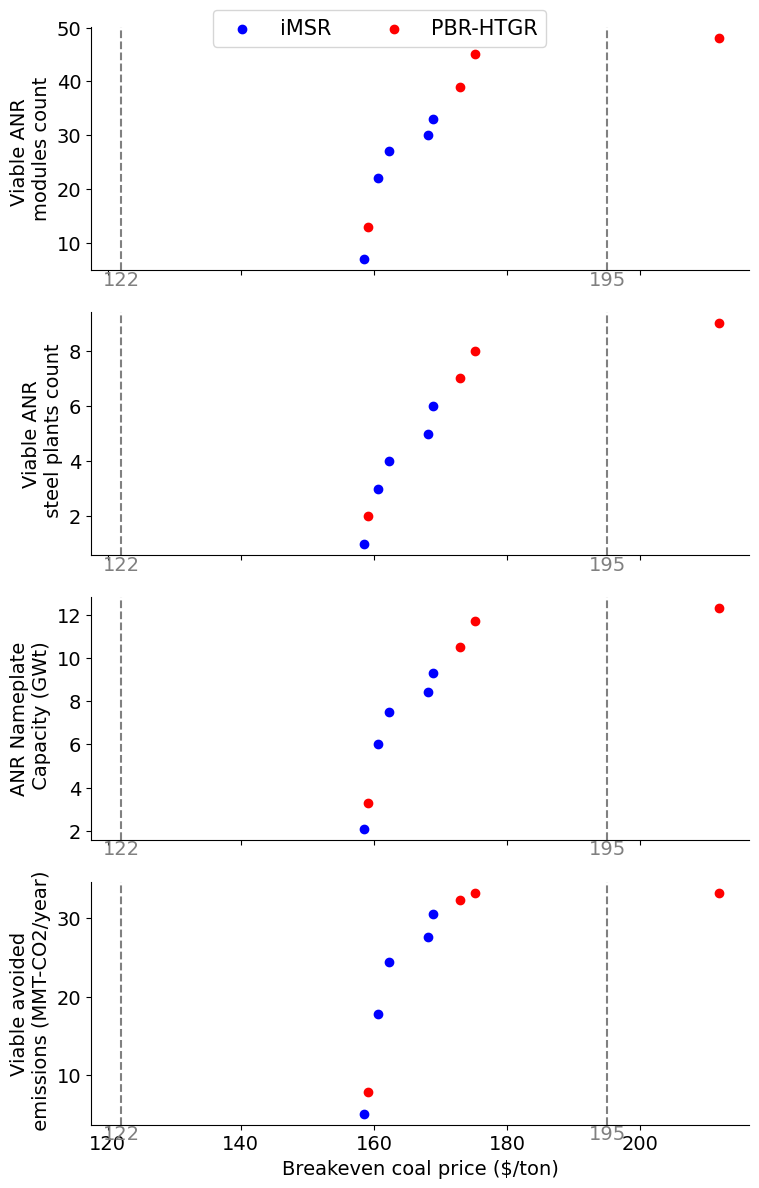

In [52]:
#Use latex font
#plt.rcParams['text.usetex'] = True
plt.rcParams['legend.fontsize'] = 15
plt.rcParams['font.size'] = 14

# Create subplots
fig, axs = plt.subplots(4, 1, sharex=True, figsize=(8, 12))

# Get unique ANR types and assign colors
anr_types = df['ANR type'].unique()

colors = ['blue', 'red', 'black']  # Adjust the colors according to the unique ANR types
# Initialize empty handles for legend
handles = []
# Plotting the data as scatter plots with different colors for each ANR type
labels = {'Viable ANR modules count': 'Viable ANR \nmodules count', 
            'Viable ANR steel plants count': 'Viable ANR\n steel plants count', 
            'ANR Nameplate Capacity (GWt)': 'ANR Nameplate\n Capacity (GWt)',
            'Viable avoided emissions (MMT-CO2/year)': 'Viable avoided\n emissions (MMT-CO2/year)'}
for i, col in enumerate(['Viable ANR modules count', 'Viable ANR steel plants count', 'ANR Nameplate Capacity (GWt)', 'Viable avoided emissions (MMT-CO2/year)']):
    for anr_type, color in zip(anr_types, colors):
        subset = df[df['ANR type'] == anr_type]
        axs[i].scatter(subset['Breakeven price ($/ton)'], subset[col], color=color, label=f'{anr_type}')
    axs[i].set_ylabel(labels[col])

    # Remove the top and right spines
    axs[i].spines['top'].set_visible(False)
    axs[i].spines['right'].set_visible(False)

    #axs[i].set_ylim([100,300])

    # Adding vertical lines
    vertical_lines = [195,122]
    for line in vertical_lines:
        axs[i].axvline(x=line, linestyle='--', color='grey')
        axs[i].text(line, axs[i].get_ylim()[0], str(line), color='grey', va='top', ha='center')
# Setting the title and labels
plt.xlabel('Breakeven coal price ($/ton)')


# Add a common legend for all subplots
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=len(anr_types))
fig.tight_layout()
#plt.show()
plt.savefig('./results/breakeven_price_steel.png')